## Bayes' Theorem, Disease Example, and Toy Epidemic Simulation

### Conditional Probability

Conditional probability is the measure of the probability of an event occuring given that another event has already occured.

$$P(A|B)=\frac{P(A \cap B)}{P(B)}$$

For example, the conditional probability of event A given the sample space S is equal to the probability of A.

$$P(A|S)=\frac{P(A \cap S)}{P(S)}=\frac{P(A)}{P(S)}=P(A)$$

In addition; two subsets, A and B, are said to be independent if $P(A|B)=P(A)$ and $P(B|A)=P(B)$.

### Bayes' Theorem and Law of Total Probability

If we combine the equations of $P(A|B)$ and $P(B|A)$, we obtain the Bayes' Theorem.

$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$

We can use law of total probability to express $P(B)$ via several distinct events.

$$P(B)=\sum_{i=1}^n P(B|A_{i})P(A_{i})$$

If we combine those 2 equations, we get

$$P(A|B)=\frac{P(B|A)P(A)}{\sum_{i=1}^n P(B|A_{i})P(A_{i})}.$$

Bayes' theorem is important because it provides a systematic way to update the probability of a hypothesis based on new evidence.

### Disease Example

#### Effect of Number of Tests

Assume that there is an epidemic disease. We will calculate the probability of a person to have the disease given the test result is positive (for both one positive test and two successive positive tests) using the sensitivity of the test and a-priori probability.

Given: \
• probability for a test to be positive is 0.98 for an infected person, meaning $P(+|I)=0.98$ and $P(-|I)=0.02$ \
• probability for a test to be positive is 0.03 for a healthy person, meaning $P(+|H)=0.03$ and $P(-|H)=0.97$ \
• average a-priori probability to be infected is 0.01 (hypothesis), meaning $P(I)=0.01$ and $P(H)=0.99$

The probability of being infected given one positive tests:

$$P(I|+)=\frac{P(+|I)P(I)}{\sum P(+|I_{i})P(I_{i})}=\frac{P(+|I)P(I)}{P(+|I)P(I)+P(+|H)P(H)}=\frac{(0.98)(0.01)}{(0.98)(0.01)+(0.03)(0.99)}=0.2481=24.81\%$$

For two successive positive tests: \
• new a-priori probability to be infected is 0.2481, meaning $P(I)=0.2481$ and $P(H)=0.7519$

The probability of being infected given two successive positive tests:

$$P(I|+)=\frac{P(+|I)P(I)}{\sum P(+|I_{i})P(I_{i})}=\frac{P(+|I)P(I)}{P(+|I)P(I)+P(+|H)P(H)}=\frac{(0.98)(0.2481)}{(0.98)(0.2481)+(0.03)(0.7519)}=0.9151=91.51\%$$

#### Effect of A-priori Probability (Hypothesis)

Now, we will show how the probability of being infected changes depending on the a-priori probability.

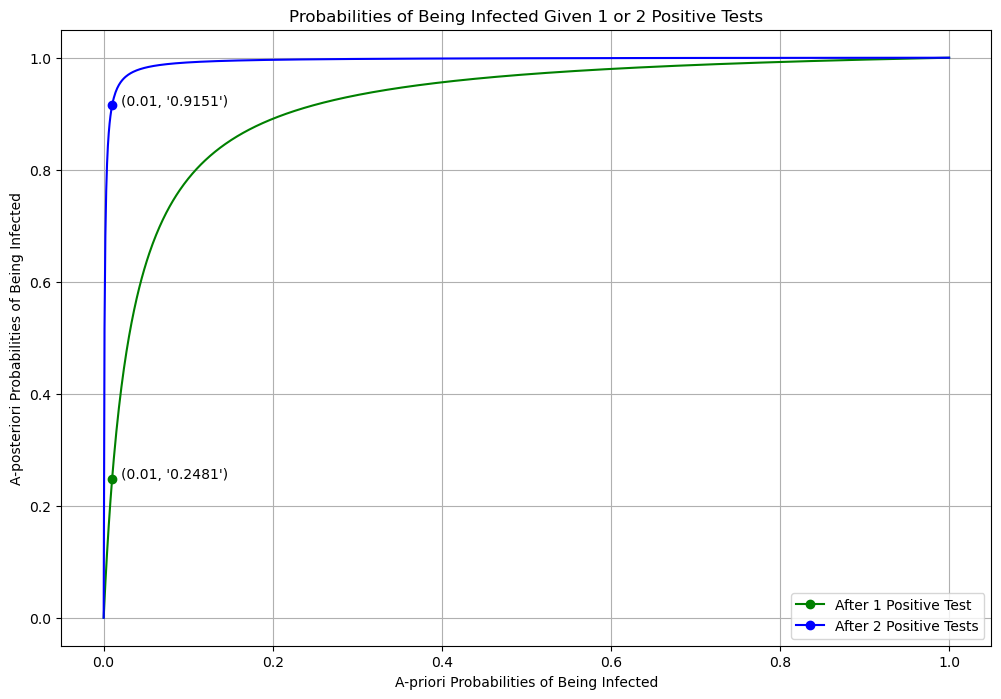

In [1]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# given
pP_givenI = 0.98              # probability of positive test given the person is infected
pP_givenH = 0.03              # probability of positive test given the person is healthy
pI = np.linspace(0, 1, 1001)  # space of a-priori probabilities from 0 to 1 with the stepsize of 0.001

# first test
pP = pP_givenI * pI + pP_givenH * (1-pI)  # prababilities for one positive test
pI_givenP = pP_givenI * pI / pP           # probabilities for the person to be infected given one positive test

# second test
pPP = pP_givenI * pI_givenP + pP_givenH * (1-pI_givenP)  # prababilities for two consecutive positive tests
pI_givenPP = pP_givenI * pI_givenP / pPP                 # probabilities for the person to be infected given two successive positive tests

# plot the result
plt.figure(figsize=(12, 8), facecolor='white')
plt.plot(pI, pI_givenP, "-go", markevery=[10], label="After 1 Positive Test")
plt.plot(pI, pI_givenPP, "-bo", markevery=[10], label="After 2 Positive Tests")
plt.title("Probabilities of Being Infected Given 1 or 2 Positive Tests")
plt.xlabel("A-priori Probabilities of Being Infected")
plt.ylabel("A-posteriori Probabilities of Being Infected")
plt.annotate((pI[10], "{:.4f}".format(pI_givenP[10])), xy=(pI[10]+0.01,pI_givenP[10]))
plt.annotate((pI[10], "{:.4f}".format(pI_givenPP[10])), xy=(pI[10]+0.01,pI_givenPP[10]))
plt.legend()
plt.grid(True)
plt.show()

### Toy Epidemic Simulation

We can also run a simulation for a country. This toy epidemic simulation will show the number of people for each probability set.

In [2]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# parameters
pop = 5*10**7     # population
pI = 0.01         # percentage of infected people on the country
pP_givenI = 0.98  # probability of positive test result given infected
pP_givenH = 0.03  # probability of positive test result given healthy

# create a population of 50 million with 1% infected using uniformly distributed random numbers
rng             = np.random.default_rng()
infection_state = rng.random(pop) < pI
n_infected      = np.count_nonzero(infection_state)
n_healthy       = pop - n_infected

# first test
test_infected = rng.random(pop) < pP_givenI
test_healthy  = rng.random(pop) < pP_givenH
test_results  = np.where(infection_state, test_infected, test_healthy)

# first test counts
n_results_P   = np.count_nonzero(test_results)
n_results_N   = pop - n_results_P

# first test counts depending on infection_state
n_infected_P  = np.count_nonzero( infection_state & test_results)
n_healthy_P   = np.count_nonzero(~infection_state & test_results)
n_infected_N  = n_infected - n_infected_P
n_healthy_N   = n_healthy  - n_healthy_P

# second test
test2_infected = rng.random(pop) < pP_givenI
test2_healthy  = rng.random(pop) < pP_givenH
test2_results  = np.where(infection_state, test2_infected, test2_healthy)

# second test counts
n_results_PP   = np.count_nonzero( test_results & test2_results)
n_results_NP   = np.count_nonzero(~test_results & test2_results)
n_results_PN   = n_results_P - n_results_PP
n_results_NN   = n_results_N - n_results_NP

# second test counts depending on infection_state
n_infected_PP  = np.count_nonzero( infection_state &  test_results & test2_results)
n_infected_NP  = np.count_nonzero( infection_state & ~test_results & test2_results)
n_healthy_PP   = np.count_nonzero(~infection_state &  test_results & test2_results)
n_healthy_NP   = np.count_nonzero(~infection_state & ~test_results & test2_results)
n_infected_PN  = n_infected_P - n_infected_PP
n_infected_NN  = n_infected_N - n_infected_NP
n_healthy_PN   = n_healthy_P  - n_healthy_PP
n_healthy_NN   = n_healthy_N  - n_healthy_NP


Calculations are now done. First, we print the results.

In [3]:
# print results
print("Number of infected people in population:", n_infected)
print("Number of healthy people in population :", n_healthy)
print("\nNumber of positive results in first test:", n_results_P)
print("Number of negative results in first test:", n_results_N)
print("\nInfected and first test result positive :", n_infected_P)
print("Healthy  but first test result positive :", n_healthy_P)
print("Infected but first test result negative :", n_infected_N)
print("Healthy  and first test result negative :", n_healthy_N)
print("\nNumber of positive-positive results:", n_results_PP)
print("Number of negative-positive results:", n_results_NP)
print("Number of positive-negative results:", n_results_PN)
print("Number of negative-negative results:", n_results_NN)
print("\nInfected and test results positive-positive :", n_infected_PP)
print("Infected but test results negative-positive :", n_infected_NP)
print("Healthy  but test results positive-positive :", n_healthy_PP)
print("Healthy  and test results negative-positive :", n_healthy_NP)
print("Infected and test results positive-negative :", n_infected_PN)
print("Infected but test results negative-negative :", n_infected_NN)
print("Healthy  but test results positive-negative :", n_healthy_PN)
print("Healthy  and test results negative-negative :", n_healthy_NN)


Number of infected people in population: 499627
Number of healthy people in population : 49500373

Number of positive results in first test: 1973676
Number of negative results in first test: 48026324

Infected and first test result positive : 489657
Healthy  but first test result positive : 1484019
Infected but first test result negative : 9970
Healthy  and first test result negative : 48016354

Number of positive-positive results: 524422
Number of negative-positive results: 1450043
Number of positive-negative results: 1449254
Number of negative-negative results: 46576281

Infected and test results positive-positive : 479729
Infected but test results negative-positive : 9756
Healthy  but test results positive-positive : 44693
Healthy  and test results negative-positive : 1440287
Infected and test results positive-negative : 9928
Infected but test results negative-negative : 214
Healthy  but test results positive-negative : 1439326
Healthy  and test results negative-negative : 46576067


We start visualizing the test results with a pie chart that shows the percentages for each group independent of the infection state.

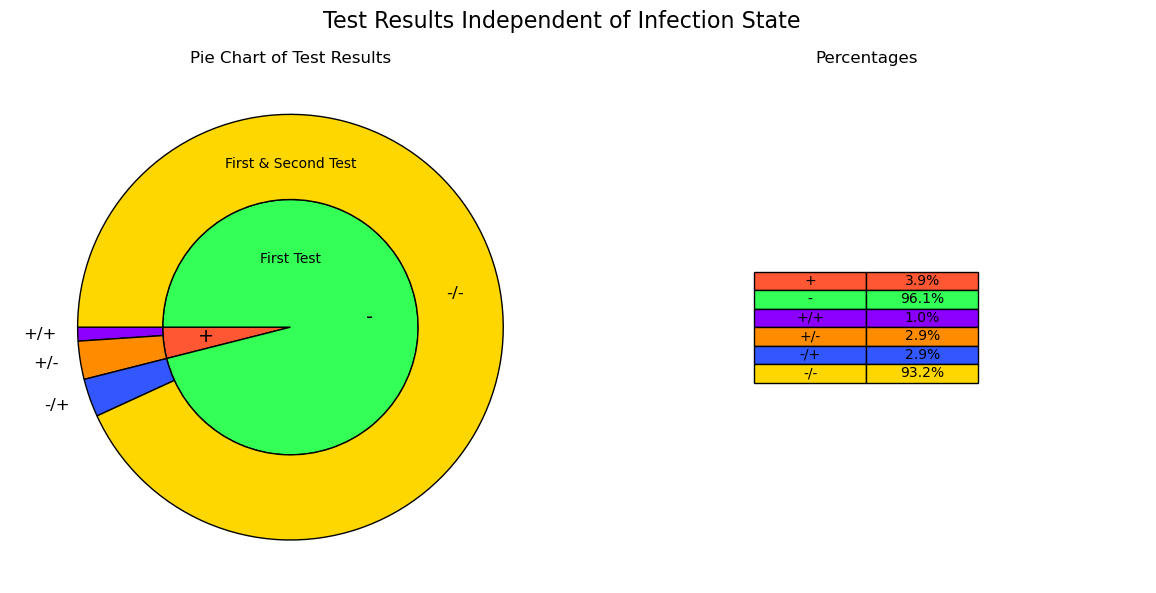

In [4]:
# pie chart setup
data1 = [n_results_P, n_results_N]
data2 = [n_results_PP, n_results_PN, n_results_NP, n_results_NN]
labels1 = ['+', '-']
labels2 = ['+/+', '+/-', '-/+', '-/-']
label_distances = [1.1, 1.1, 1.1, 0.75]
colors1 = ['#FF5733', '#33FF57']
colors2 = ['#8B00FF', '#FF8C00', '#3357FF', '#FFD700']

# table setup
colors_table = colors1 + colors2
table_data = np.array([
    ['+',   f"{(n_results_P  / pop * 100):.1f}%"], 
    ['-',   f"{(n_results_N  / pop * 100):.1f}%"], 
    ['+/+', f"{(n_results_PP / pop * 100):.1f}%"], 
    ['+/-', f"{(n_results_PN / pop * 100):.1f}%"], 
    ['-/+', f"{(n_results_NP / pop * 100):.1f}%"], 
    ['-/-', f"{(n_results_NN / pop * 100):.1f}%"]
])

# plot pie chart and table side by side with given size
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# pie chart
ax[0].pie(data1, labels=labels1, radius=0.6, startangle=180, labeldistance=0.6, 
                wedgeprops={'edgecolor':'black'}, colors=colors1, textprops={'fontsize': 14})
wedges, texts = ax[0].pie(data2, labels=labels2, radius=1.0, startangle=180, colors=colors2, 
                wedgeprops={'width':0.4, 'edgecolor':'black'}, textprops={'fontsize': 12})
ax[0].axis('equal')
ax[0].set_title("Pie Chart of Test Results", fontsize=12)

# texts on the pie chart
ax[0].text(0, 0.3, 'First Test', ha='center')
ax[0].text(0, 0.75, 'First & Second Test', ha='center')

# adjust label distances of outer pie
for i, text in enumerate(texts):
    x, y = text.get_position()
    angle = np.arctan2(y, x)
    text.set_position((label_distances[i] * np.cos(angle), label_distances[i] * np.sin(angle)))

# table
table = ax[1].table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.2, 0.2])
ax[1].axis('off')
ax[1].set_title("Percentages", fontsize=12)

# fill each row of the table with corresponding color
for (row, color) in zip(range(len(table_data)), colors_table):
    for col in range(2):
        table[(row, col)].set_facecolor(color)

# adjust font size of the table
table.auto_set_font_size(False)
table.set_fontsize(10)

# plot
fig.suptitle("Test Results Independent of Infection State", fontsize=16)
plt.tight_layout()
plt.show()


Now, we will show the results of the first test dependent on infection state with two pie charts (main/exploded and zoom).

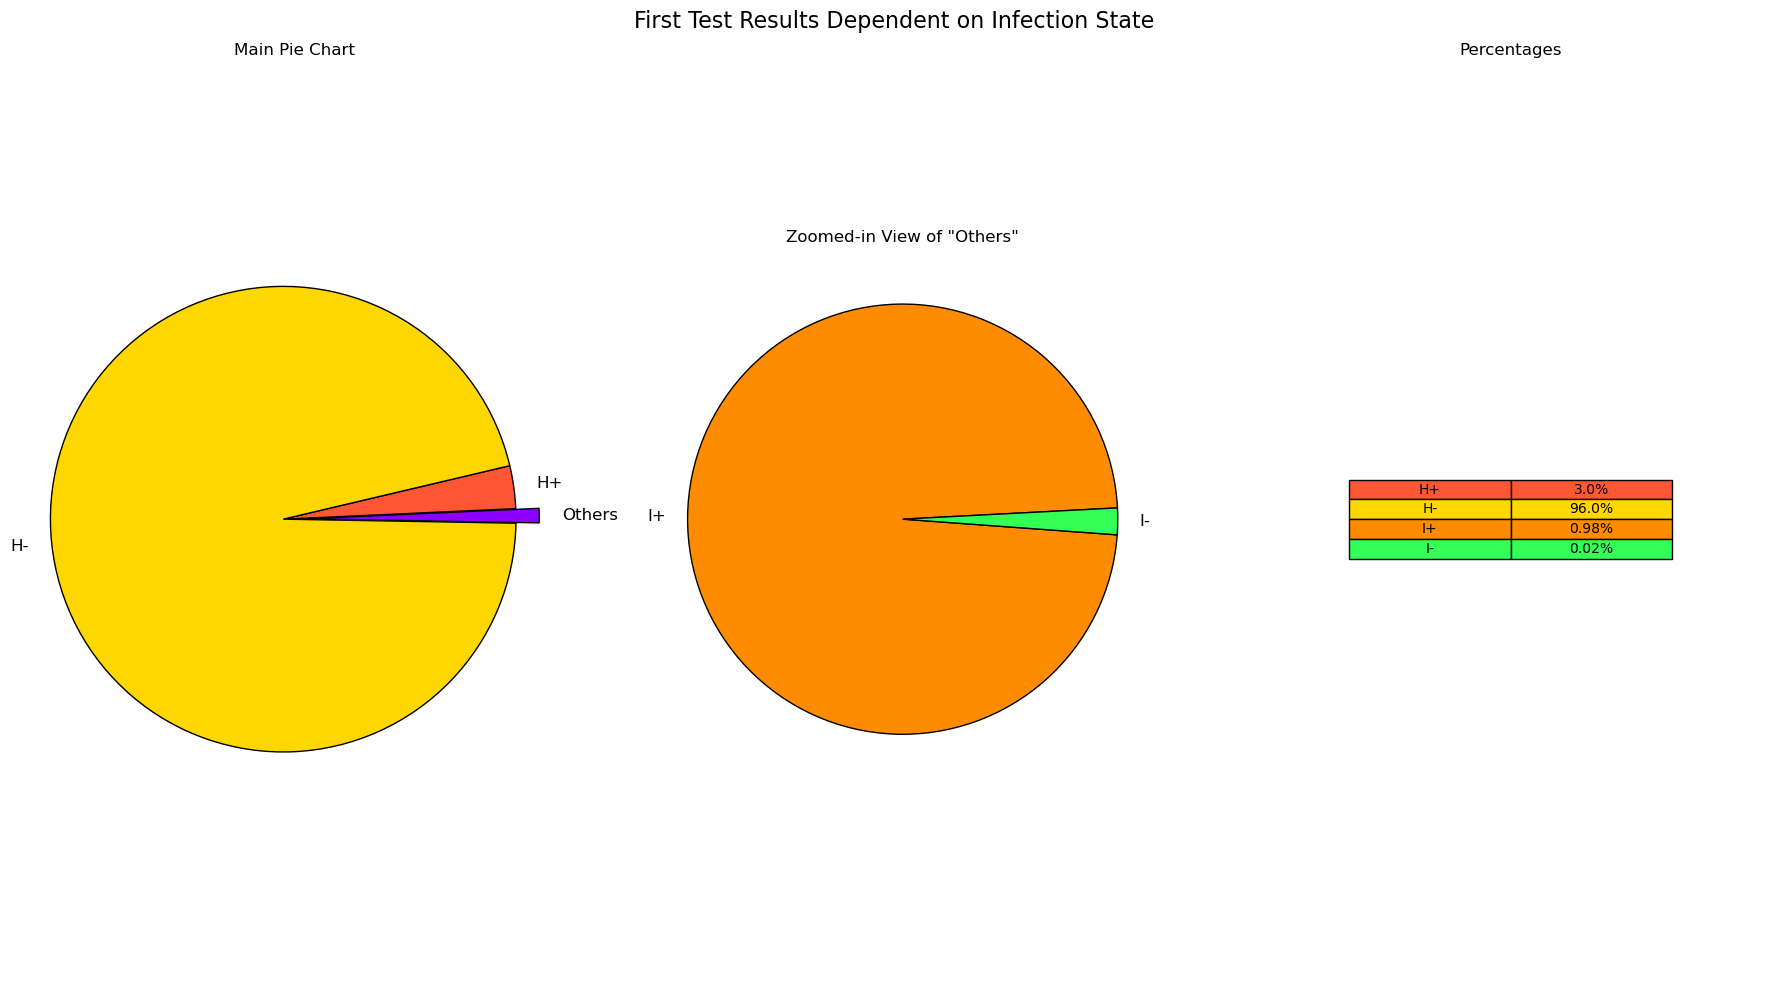

In [5]:
# main pie chart setup
others1 = n_infected_P + n_infected_N
data_main = [others1, n_healthy_P, n_healthy_N]
labels_main = ['Others', 'H+', 'H-']
colors_main = ['#8B00FF', '#FF5733', '#FFD700']

# zoom pie chart setup
data_zoom = [n_infected_P, n_infected_N]
labels_zoom = ['I+', 'I-']
colors_zoom = ['#FF8C00', '#33FF57']

# table setup
colors_table_first = colors_main[1:] + colors_zoom
table_data_first = np.array([
    ['H+',   f"{(n_healthy_P  / pop * 100):.1f}%"], 
    ['H-',   f"{(n_healthy_N  / pop * 100):.1f}%"], 
    ['I+', f"{(n_infected_P / pop * 100):.2f}%"], 
    ['I-', f"{(n_infected_N / pop * 100):.2f}%"]
])

# plot pie charts and table side by side with given size
fig, ax = plt.subplots(1, 3, figsize=(18, 10))

# main pie chart
ax[0].pie(data_main, labels=labels_main, labeldistance=1.1, startangle=-1, explode=(0.1, 0, 0), 
          colors=colors_main, wedgeprops={'edgecolor':'black'}, textprops={'fontsize': 12})
ax[0].axis('equal')
ax[0].set_title('Main Pie Chart')

# zoom pie chart
ax[1].pie(data_zoom, labels=labels_zoom, labeldistance=1.1, startangle=3, colors=colors_zoom,
          wedgeprops={'edgecolor':'black'}, textprops={'fontsize': 12})
ax[1].set_title('Zoomed-in View of "Others"', fontsize=12)

# table
table_first = ax[2].table(cellText=table_data_first, loc='center', cellLoc='center', colWidths=[0.3, 0.3])
ax[2].axis('off')
ax[2].set_title("Percentages", fontsize=12)

# fill each row of the table with corresponding color
for (row, color) in zip(range(len(table_data_first)), colors_table_first):
    for col in range(2):
        table_first[(row, col)].set_facecolor(color)

# adjust font size of the table
table_first.auto_set_font_size(False)
table_first.set_fontsize(10)

# plot
fig.suptitle("First Test Results Dependent on Infection State", fontsize=16)
plt.tight_layout()
plt.show()

Finally, we will do the same for two consecutive test results.

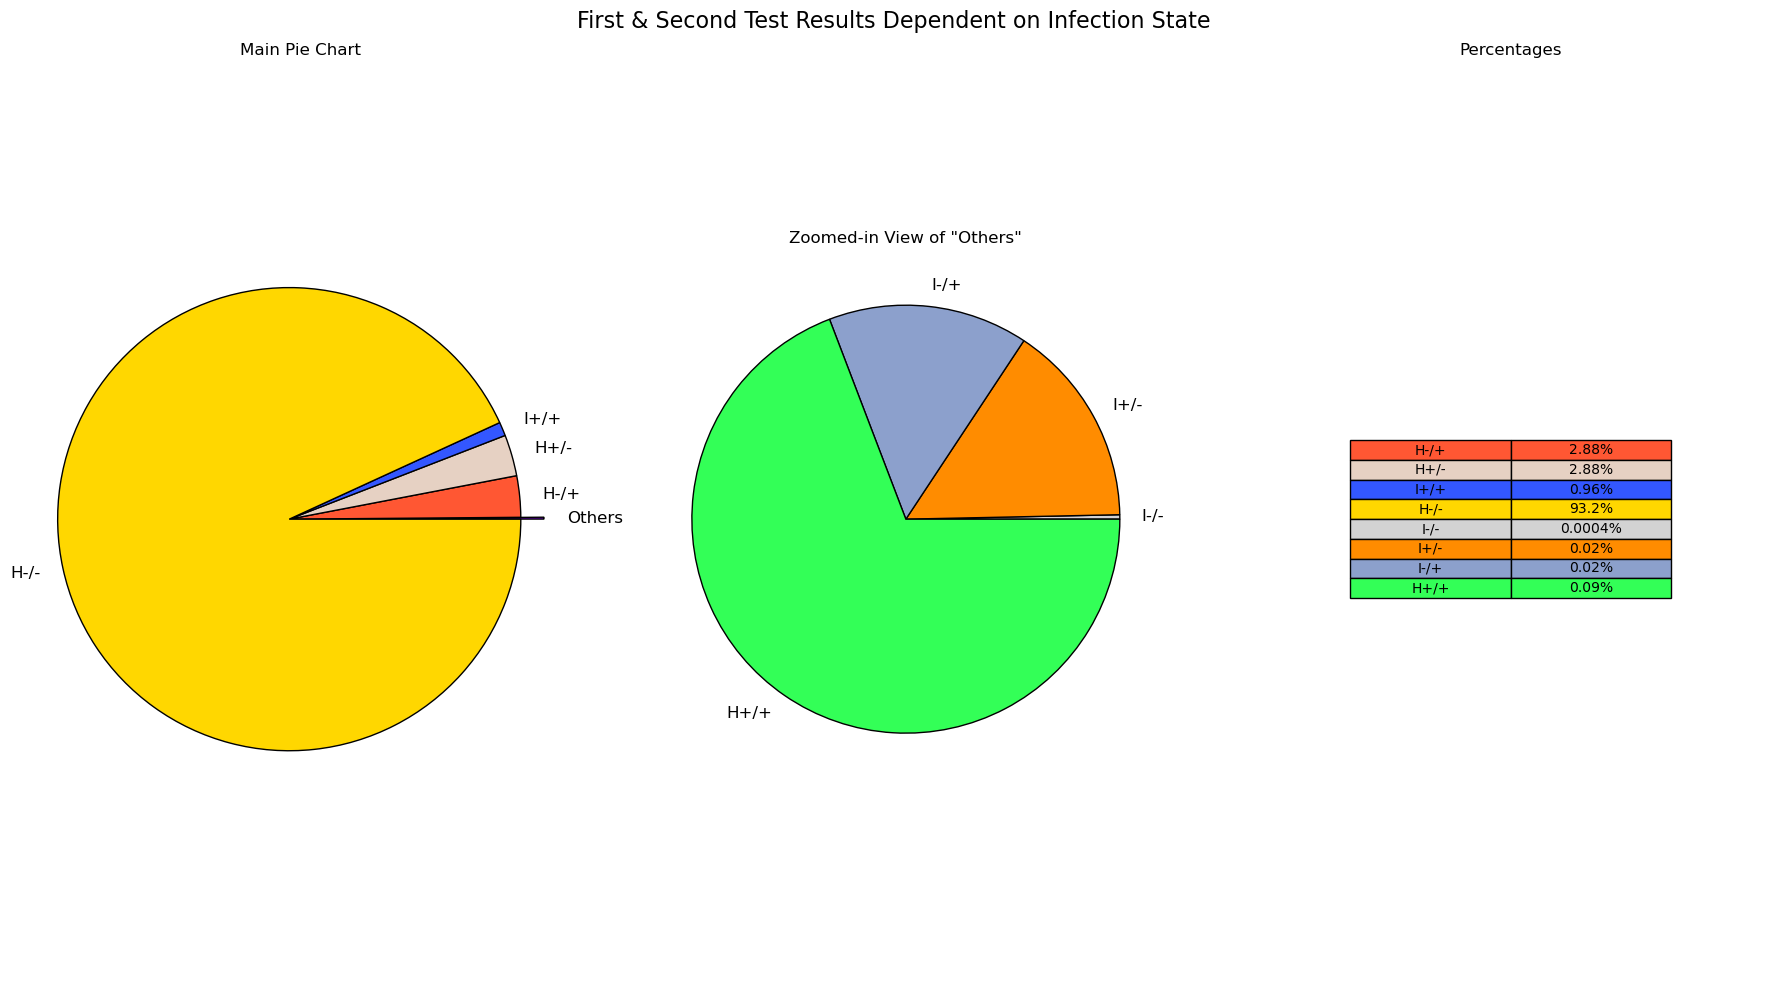

In [6]:
# main pie chart setup
others2 = n_infected_PN + n_infected_NP + n_infected_NN + n_healthy_PP
data2_main = [others2, n_healthy_NP, n_healthy_PN, n_infected_PP, n_healthy_NN]
labels2_main = ['Others', 'H-/+', 'H+/-', 'I+/+', 'H-/-']
colors2_main = ['#8B00FF', '#FF5733', '#E6D1C3', '#3357FF', '#FFD700']

# zoom pie chart setup
data2_zoom = [n_infected_NN, n_infected_PN, n_infected_NP, n_healthy_PP]
labels2_zoom = ['I-/-', 'I+/-', 'I-/+', 'H+/+']
colors2_zoom = ['#D3D3D3', '#FF8C00', '#8CA0CC', '#33FF57']

# table setup
colors_table_second = colors2_main[1:] + colors2_zoom
table_data_second = np.array([
    ['H-/+',   f"{(n_healthy_NP  / pop * 100):.2f}%"], 
    ['H+/-',   f"{(n_healthy_PN  / pop * 100):.2f}%"], 
    ['I+/+',   f"{(n_infected_PP / pop * 100):.2f}%"], 
    ['H-/-',   f"{(n_healthy_NN  / pop * 100):.1f}%"],
    ['I-/-',   f"{(n_infected_NN / pop * 100):.4f}%"],
    ['I+/-',   f"{(n_infected_PN / pop * 100):.2f}%"],
    ['I-/+',   f"{(n_infected_NP / pop * 100):.2f}%"],
    ['H+/+',   f"{(n_healthy_PP  / pop * 100):.2f}%"]
])

# plot pie charts and table side by side with given size
fig, ax = plt.subplots(1, 3, figsize=(18, 10))

# main pie chart
ax[0].pie(data2_main, labels=labels2_main, labeldistance=1.1, startangle=0, explode=(0.1, 0, 0, 0, 0), 
           colors=colors2_main, wedgeprops={'edgecolor':'black'}, textprops={'fontsize': 12})
ax[0].axis('equal')
ax[0].set_title('Main Pie Chart')

# zoom pie chart
ax[1].pie(data2_zoom, labels=labels2_zoom, labeldistance=1.1, startangle=0, colors=colors2_zoom,
          wedgeprops={'edgecolor':'black'}, textprops={'fontsize': 12})
ax[1].set_title('Zoomed-in View of "Others"', fontsize=12)

# table
table_second = ax[2].table(cellText=table_data_second, loc='center', cellLoc='center', colWidths=[0.3, 0.3])
ax[2].axis('off')
ax[2].set_title("Percentages", fontsize=12)

# fill each row of the table with corresponding color
for (row, color) in zip(range(len(table_data_second)), colors_table_second):
    for col in range(2):
        table_second[(row, col)].set_facecolor(color)

# adjust font size of the table
table_second.auto_set_font_size(False)
table_second.set_fontsize(10)

# plot
fig.suptitle("First & Second Test Results Dependent on Infection State", fontsize=16)
plt.tight_layout()
plt.show()